python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load the titanic dataset

In [2]:
titanic=pd.read_csv('/content/titanic.csv')

display the first 10 rows

In [3]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


dataset shape to check the number of rows and columns


In [4]:
titanic.shape

(891, 12)

print unique values in each column to know the nature of the columns


In [5]:
titanic.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


# Show the non-null counts and data types for each column

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


data cleaning


imputing the missing values

In [7]:
# 1. Impute missing Age with median
age_median = titanic['Age'].median()
print(f"Median Age: {age_median}")
titanic['Age'].fillna(age_median, inplace=True)

# 2. Impute missing Embarked with mode
embarked_mode = titanic['Embarked'].mode()[0]
print(f"Most Frequent Embarked Port: {embarked_mode}")
titanic['Embarked'].fillna(embarked_mode, inplace=True)


Median Age: 28.0
Most Frequent Embarked Port: S


<ipython-input-7-c3faa081fc59>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(age_median, inplace=True)
<ipython-input-7-c3faa081fc59>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

drop colum cabin due it is high missing vaues which is high as more than three quarters of it is exprected data

In [8]:
titanic.drop(columns="Cabin", inplace=True)

check for missing values if still exist


In [9]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


summary of statistics

In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 🧠 Feature Engineering: Title Extraction from the Name column

We extracted passenger titles (e.g., Mr, Miss, Mrs) from the `Name` column to capture additional information related to social status, gender, and age. These titles can improve model accuracy by providing a more meaningful representation of passenger identity than raw names.

Steps:
- Extracted titles from the `Name` field using regular expressions.
- Grouped rare or less common titles into a single "Rare" category.
- Standardized similar titles (e.g., `Mlle` and `Ms` → `Miss`).
- Applied one-hot encoding to prepare the titles for machine learning.


In [12]:
# Step 3: Feature Engineering

# 1. Extract Title from Name
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 2. Standardize similar titles (no inplace warning now)
titanic['Title'] = titanic['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

# 3. Group rare titles
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
               'Rev', 'Sir', 'Jonkheer', 'Dona']
titanic['Title'] = titanic['Title'].apply(lambda x: 'Rare' if x in rare_titles else x)

# 4. Drop 'Name' and 'Ticket'
titanic.drop(columns=['Name', 'Ticket'], inplace=True)

# 5. One-hot encode categorical columns
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Check result
titanic.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,22.0,1,0,7.2500,True,False,True,False,True,False,False
1,2,1,1,38.0,1,0,71.2833,False,False,False,False,False,True,False
2,3,1,3,26.0,0,0,7.9250,False,False,True,True,False,False,False
3,4,1,1,35.0,1,0,53.1000,False,False,True,False,False,True,False
4,5,0,3,35.0,0,0,8.0500,True,False,True,False,True,False,False


Step 4: Exploratory Data Analysis (EDA)
Let’s answer the question:

What factors influence survival on the Titanic?

We'll use visualizations to get insights. Here's what we'll cover:

🔍 Survival Analysis by Features:

      Survival Rate by Pclass

      Survival Rate by Sex

      Survival Rate by Title

      Survival Rate by Embarked Port

      Age and Fare distribution by survival status



Survival Rate by **Pclass**

In [13]:
titanic['Pclass'].unique()

array([3, 1, 2])

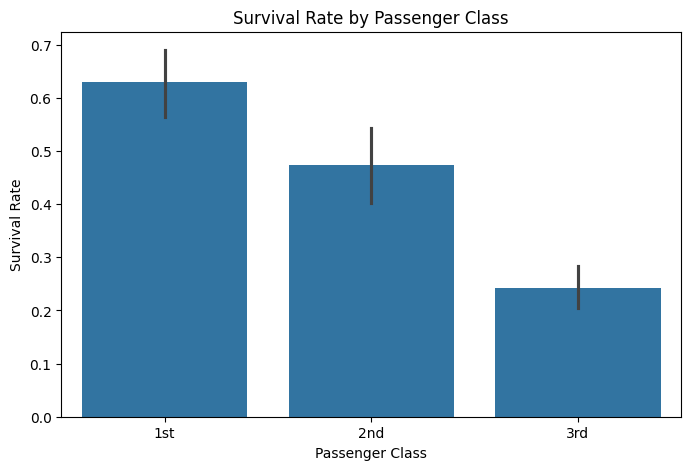

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot: Survival by Pclass
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.xticks([0, 1, 2], ['1st', '2nd', '3rd'])
plt.show()


survival rate by **sex**

Check unique values in Sex_male column:

In [15]:
print(titanic['Sex_male'].value_counts())


Sex_male
True     577
False    314
Name: count, dtype: int64


check the group wise surval means

In [16]:
print(titanic.groupby('Sex_male')['Survived'].mean())


Sex_male
False    0.742038
True     0.188908
Name: Survived, dtype: float64


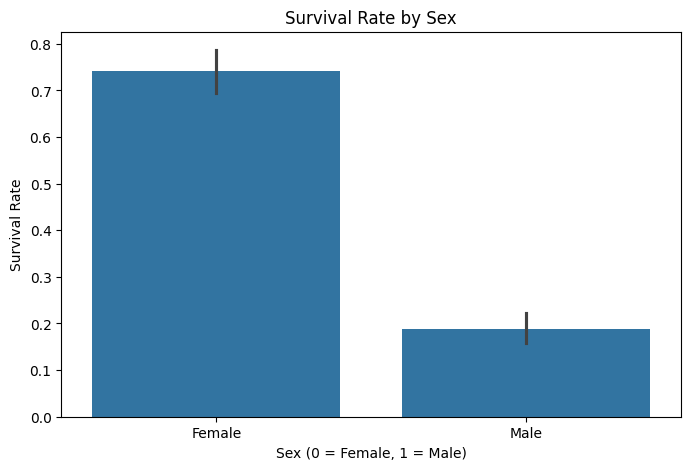

In [17]:
# Plot: Survival Rate by Sex
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex_male', y='Survived', data=titanic)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


Survival Rate by Title

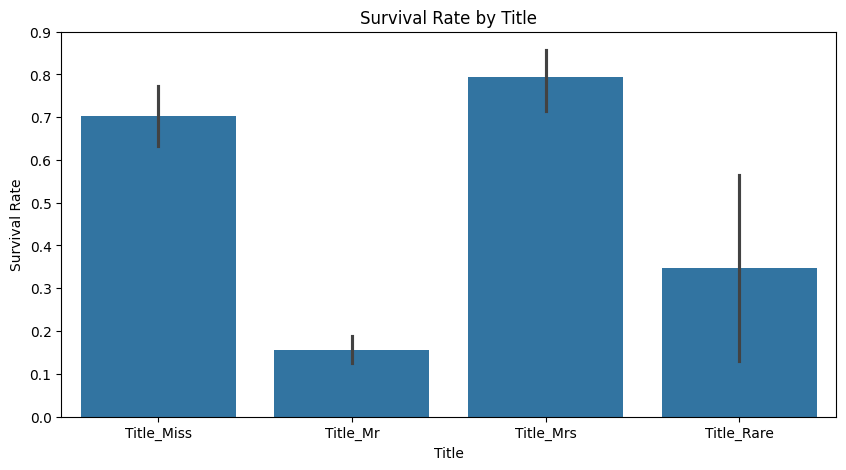

In [18]:
title_cols = ['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']
titanic_melted = titanic[['Survived'] + title_cols].melt(id_vars='Survived', var_name='Title', value_name='Is_Title')
title_survival = titanic_melted[titanic_melted['Is_Title'] == 1]

plt.figure(figsize=(10, 5))
sns.barplot(x='Title', y='Survived', data=title_survival)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.xlabel('Title')
plt.show()


Age and Fare Distribution by Survival

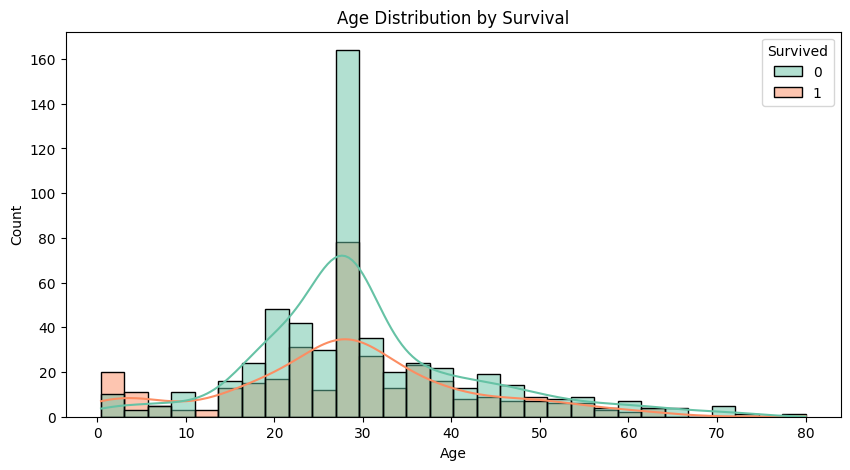

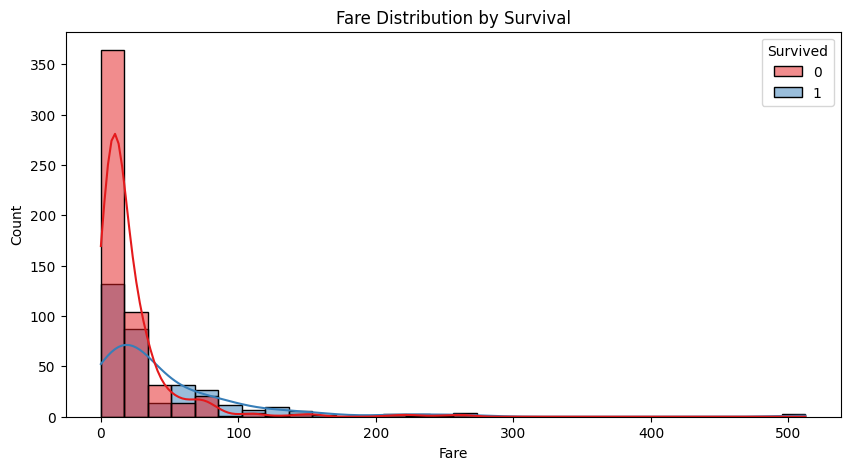

In [19]:
# Age
plt.figure(figsize=(10, 5))
sns.histplot(data=titanic, x='Age', hue='Survived', bins=30, kde=True, palette='Set2')
plt.title('Age Distribution by Survival')
plt.show()

# Fare
plt.figure(figsize=(10, 5))
sns.histplot(data=titanic, x='Fare', hue='Survived', bins=30, kde=True, palette='Set1')
plt.title('Fare Distribution by Survival')
plt.show()


# Correlation **Heatmap**

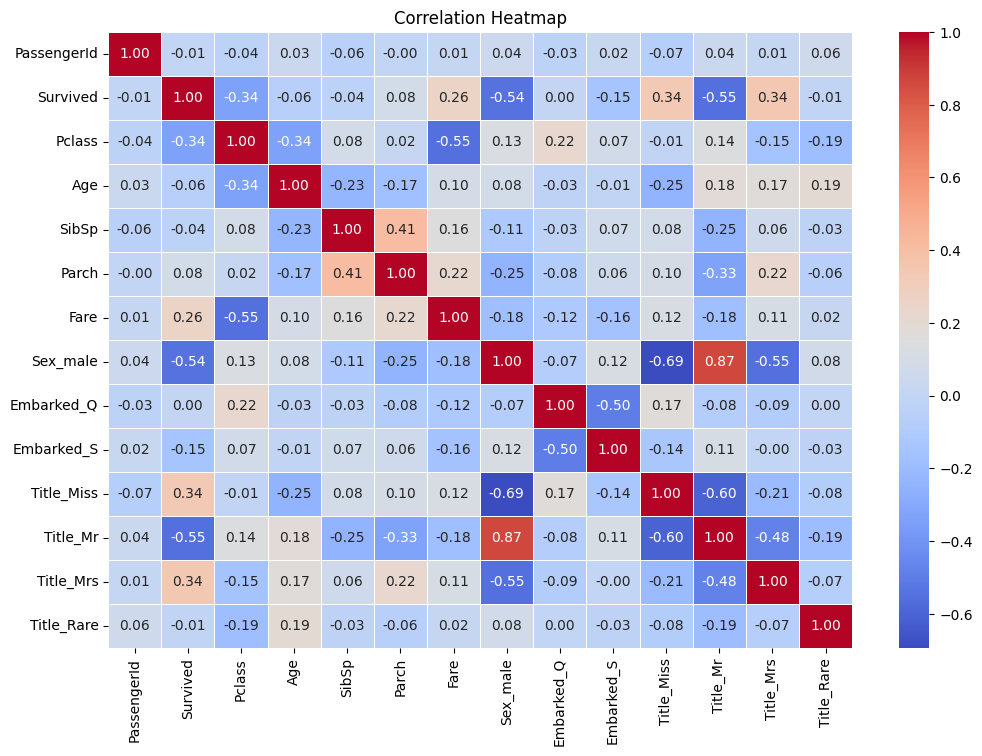

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = titanic.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Feature Engineering


In [21]:
# Combine SibSp and Parch into Family_Size
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch']

# Drop unnecessary or collinear features
drop_cols = [
    'PassengerId', 'SibSp', 'Parch',
    'Title_Mr', 'Title_Mrs', 'Title_Rare',
    'Embarked_Q', 'Embarked_S'
]

titanic.drop(columns=drop_cols, inplace=True)


In [22]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   Fare         891 non-null    float64
 4   Sex_male     891 non-null    bool   
 5   Title_Miss   891 non-null    bool   
 6   Family_Size  891 non-null    int64  
dtypes: bool(2), float64(2), int64(3)
memory usage: 36.7 KB


**split the data **

Separate features from the target (Survived), then split into training/test sets:

In [23]:
from sklearn.model_selection import train_test_split

X = titanic.drop(columns=['Survived'])
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


build the baseline

In [24]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
baseline_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training data
baseline_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Evaluate the model

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = baseline_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

#confusion matrix
print(confusion_matrix(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Baseline Model Accuracy: 0.7989
[[90 15]
 [21 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



 Model Performance
Accuracy: 79.89% — solid for a baseline.

Confusion Matrix:


[[90 15]
 [21 53]]
Class 0 (not survived): 90 correct, 15 incorrect

Class 1 (survived): 53 correct, 21 incorrect

📊 Classification Report Insights
Precision (1): 0.78 → when it predicts survived, it's right 78% of the time

Recall (1): 0.72 → it detects 72% of actual survivors

Balanced precision/recall = good starting point

ROC curve

then we calculate the Area Under Curve

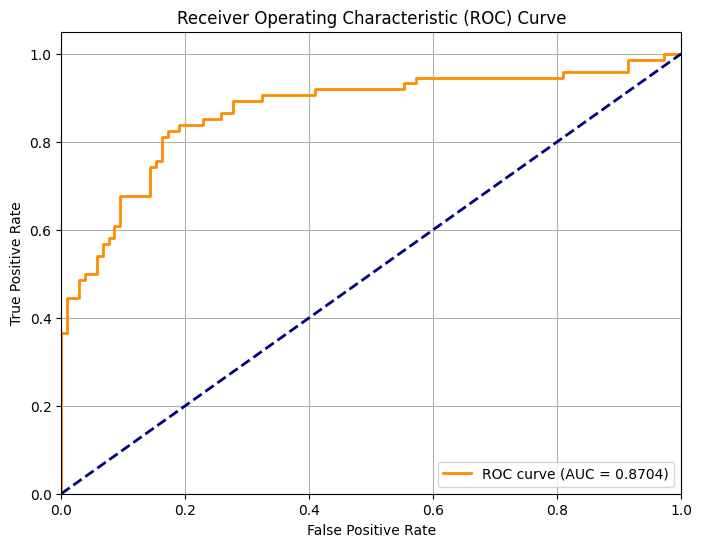

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score  # Import functions to compute ROC curve and AUC score
import matplotlib.pyplot as plt  # Import plotting library

# Get predicted probabilities for the positive class (Survived = 1)
y_probs = baseline_model.predict_proba(X_test)[:, 1]  # [:, 1] extracts probability for class 1

# Compute the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test, y_probs)

# Start plotting
plt.figure(figsize=(8, 6))  # Set the plot size

# Plot the ROC curve (TPR vs FPR)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Add axis labels
plt.xlabel('False Positive Rate')  # X-axis: False Positives
plt.ylabel('True Positive Rate')  # Y-axis: True Positives

# Add a plot title
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Display the legend in the bottom right corner
plt.legend(loc="lower right")

# Display a grid for better readability
plt.grid(True)

# Show the final plot
plt.show()


Model Comarison Code

In [30]:
# Import necessary models from scikit-learn
from sklearn.linear_model import LogisticRegression               # Logistic Regression (baseline)
from sklearn.tree import DecisionTreeClassifier                   # Decision Tree model
from sklearn.ensemble import RandomForestClassifier               # Random Forest (bagging-based ensemble)

# Import performance metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Dictionary to hold the models for comparison
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),  # Ensure convergence with max_iter
    "Decision Tree": DecisionTreeClassifier(random_state=42),                  # Basic decision tree with default depth
    "Random Forest": RandomForestClassifier(random_state=42)                   # Ensemble of trees to improve accuracy
}

# Loop through each model, train and evaluate it
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model on the training data

    y_pred = model.predict(X_test)  # Predict the labels for the test set
    y_proba = model.predict_proba(X_test)[:, 1]  # Predict probabilities for ROC/AUC (we need probs for class 1)

    acc = accuracy_score(y_test, y_pred)        # Accuracy: how many correct predictions out of total
    auc = roc_auc_score(y_test, y_proba)        # AUC: measures model's ability to distinguish classes (higher is better)

    # Print performance metrics for each model
    print(f"\n🔹 {name} 🔹")
    print(f"Accuracy: {acc:.4f}")               # Show accuracy score
    print(f"AUC Score: {auc:.4f}")              # Show ROC AUC score
    print("Classification Report:")             # Show precision, recall, f1-score, and support per class
    print(classification_report(y_test, y_pred))



🔹 Logistic Regression 🔹
Accuracy: 0.7989
AUC Score: 0.8704
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


🔹 Decision Tree 🔹
Accuracy: 0.7598
AUC Score: 0.7810
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       105
           1       0.70      0.73      0.72        74

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.76      0.76      0.76       179


🔹 Random Forest 🔹
Accuracy: 0.8101
AUC Score: 0.8945
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105


Final Model Comparison – Professional Interpretation
Metric	Logistic Regression	Decision Tree	Random Forest
Accuracy	0.7989	0.7598	0.8101 ✅
AUC Score	0.8704	0.7810	0.8945 ✅
Recall (Class 1)	0.72	0.73	0.77 ✅
Precision (Class 1)	0.78	0.70	0.77 ✅
Conclusion:

The Random Forest model outperformed the others in all key performance metrics, including:

Highest accuracy (81%)

Best AUC score (0.8945) — meaning best overall ability to distinguish between classes.

Highest recall & precision for survivors (which is crucial if the goal is to maximize identifying actual survivors).

🔍 Therefore: Random Forest is your best model, and it's suitable as your final candidate for deployment or reporting.

**Model Validation**

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the model again (or reuse the existing variable)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Average CV Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Accuracy Scores: [0.76536313 0.82022472 0.87078652 0.7752809  0.85393258]
Average CV Accuracy: 0.8171


feature importance

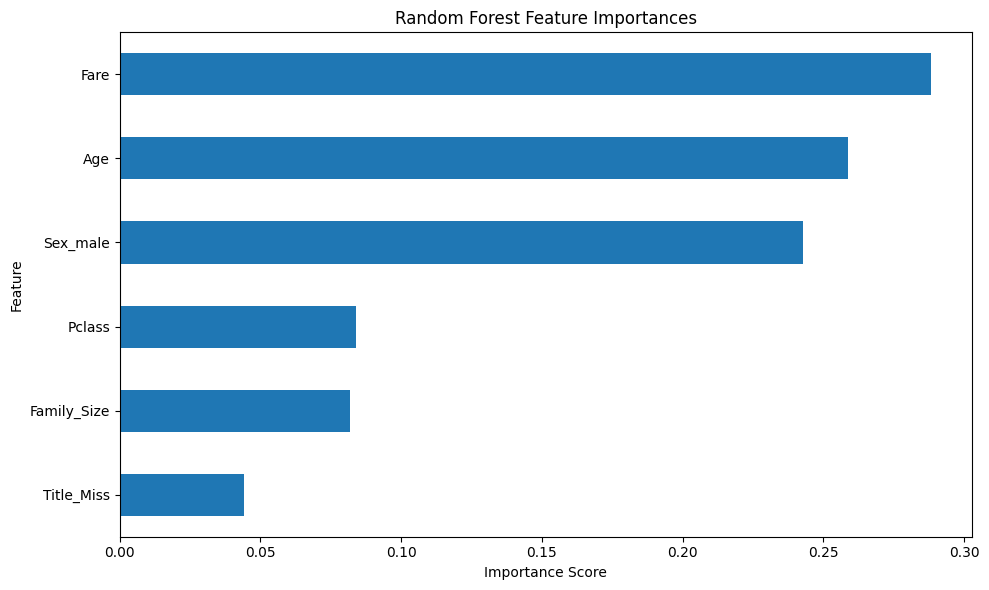

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the trained Random Forest
importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plot
importances.sort_values().plot(kind='barh', figsize=(10, 6), title='Random Forest Feature Importances')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
